In [ ]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,f1_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
import seaborn as sns

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/Laxminarayen/Inceptez-DS-Batch20/main/datasets/Automobile_data.csv")

In [ ]:
data.shape

(205, 26)

In [ ]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
data['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [ ]:
data.replace("?",np.nan, inplace = True)

In [ ]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [ ]:
string_columns = data.select_dtypes(exclude = np.number).columns.tolist()
number_cols = data.select_dtypes(include = np.number).columns.tolist()

In [ ]:
number_cols = ['wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'compression-ratio',
 'city-mpg',
 'highway-mpg']

In [ ]:
#Categorical Encoders
!pip install category_encoders
from category_encoders.leave_one_out import LeaveOneOutEncoder   

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 6.3 MB/s eta 0:00:00


In [ ]:
data.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [ ]:
data.fillna(data.median(),inplace = True)

<ipython-input-15-b07aac6fbfd0>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.median(),inplace = True)


In [ ]:
data.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [ ]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
data.dropna(inplace=True)

In [ ]:
encoder = LeaveOneOutEncoder()

In [ ]:
encoder.fit_transform(data['num-of-doors'],data['symboling'])

,num-of-doors
0,1.761364
1,1.761364
2,1.784091
3,0.088496
4,0.088496
...,...
200,0.115044
201,0.115044
202,0.115044
203,0.115044


In [ ]:
for i in string_columns:
  data[str(i)] =  encoder.fit_transform(data[str(i)],data['symboling'])

In [ ]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,0.974359,2.000000,0.901639,0.861446,1.761364,2.800000,0.680000,0.793970,88.6,...,130,0.826087,3.000000,3.000000,9.0,1.000000,1.153846,21,27,0.837438
1,3,0.974359,2.000000,0.901639,0.861446,1.761364,2.800000,0.680000,0.793970,88.6,...,130,0.826087,3.000000,3.000000,9.0,1.000000,1.153846,21,27,1.000000
2,1,1.025641,3.000000,0.912568,0.873494,1.784091,1.594203,0.706667,0.804020,94.5,...,152,0.847826,0.837438,0.333333,9.0,0.837438,1.230769,19,26,3.000000
3,2,2.000000,1.166667,0.907104,0.867470,0.088496,0.311828,0.940171,0.798995,99.8,...,109,0.836957,1.157895,1.368421,10.0,1.000000,1.285714,24,30,0.837438
4,2,2.000000,1.166667,0.907104,0.867470,0.088496,0.311828,0.250000,0.798995,99.4,...,136,0.836957,1.157895,1.368421,8.0,0.837438,1.285714,18,22,0.837438


In [ ]:
X = data.drop('symboling',axis = 1)
y = data['symboling']

In [ ]:
x_train,x_val,y_train,y_val = train_test_split(X,y,test_size=0.1,random_state = 100)

In [ ]:
rf = RandomForestClassifier(oob_score = True)
rf.fit(x_train,y_train)

RandomForestClassifier(oob_score=True)

In [ ]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': True,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
rf.oob_score_

0.9945054945054945

In [ ]:
y_predict = rf.predict(x_val)

The result with RF is: 1.0


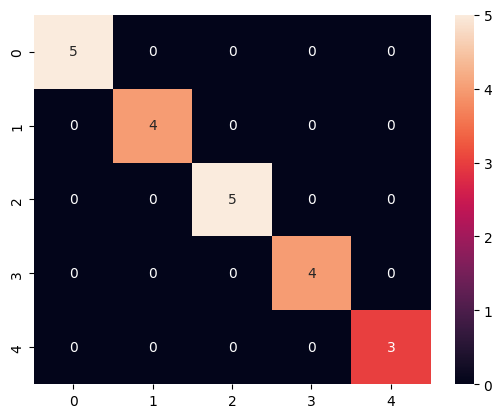

In [ ]:
sns.heatmap(confusion_matrix(y_val,y_predict),annot=True)
print("The result with RF is:", f1_score(y_val,y_predict, average = 'weighted'))

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The result with LR is: 0.2100706311232627


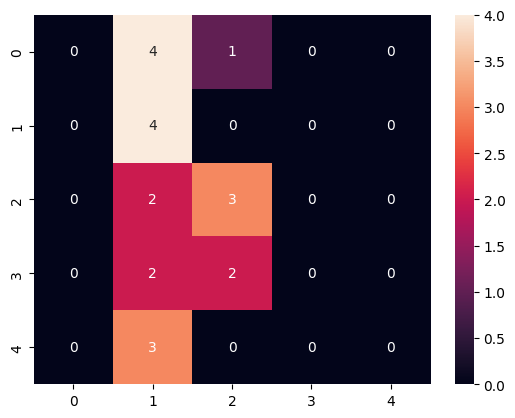

In [ ]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_predict = lr.predict(x_val)
sns.heatmap(confusion_matrix(y_val,y_predict),annot=True)
print("The result with LR is:", f1_score(y_val,y_predict, average = 'weighted'))

In [ ]:
#Gridsearch
#Randomsearch 
#Adaboost
#Hyperparameters?? - Logistic Regression, KNN, Decision Tree, Random Forest